In [1]:
"""
What is Tensorflow?

It's an open source Deep Learning library released by Google. It provides the ability to define functions on tensors.
A tensor is a multilinear map from vector spaces to the real number. It's a multidimensional array of numbers.

"""

"\nWhat is Tensorflow?\n\nIt's an open source Deep Learning library released by Google. It provides the ability to define functions on tensors.\nA tensor is a multilinear map from vector spaces to the real number. It's a multidimensional array of numbers.\n\n"

In [2]:
# tensorflow is also similar to numpy, although the latter has no GPU support
# tensorflow offers all the computations numpy does
from IPython.display import Image
Image(url='Resources/np_to_tf.png')

In [3]:
# let's import tensorflow as tf
import tensorflow as tf

In [4]:
# let's look at tensorflow data types

In [5]:
# constants in tensorflow are variables that contain fixed values given on their creation
V1 = tf.constant([1.,2.])
# you can also pass explicit names, just like in theano
V2 = tf.constant([3.,4.], name='const_V2')

In [6]:
# name arguments are useful if you want to save your variables to a binary file
# they are also used in TensorBoard, a visual representation of Tensorflow calculations (we will get to it later)

In [7]:
# these types produce tensors, tensor is a typed multy-dimensional array
print(V1)
print(V2)

Tensor("Const:0", shape=(2,), dtype=float32)
Tensor("const_V2:0", shape=(2,), dtype=float32)


In [8]:
# you can then conduct various operations on your tensors
V3 = V1 + V2
V4 = V1 * V2
print(V3)
print(V4)

Tensor("add:0", shape=(2,), dtype=float32)
Tensor("mul:0", shape=(2,), dtype=float32)


In [9]:
# we created a computational graph, it won't be calculated until we tell tensorflow to evaluate it

In [10]:
# we would need to call .eval() first
V3.eval()
V4.eval()

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [11]:
# that didn't work! but it's fine, we missed one important step
# all operations in tensorflow are evaluated within sessions
# let's create a session first
sess = tf.Session()

In [12]:
# let's create our graphs
V3 = V1 + V2
print(V3)
V4 = V1 * V2
print(V4)

Tensor("add_1:0", shape=(2,), dtype=float32)
Tensor("mul_1:0", shape=(2,), dtype=float32)


In [13]:
# now we will pass the session to the eval() fcuntion
V3.eval(session=sess)

array([4., 6.], dtype=float32)

In [14]:
V4.eval(session=sess)

array([3., 8.], dtype=float32)

In [15]:
# another way of doing the same action is by running sess.run() on the created graph
print(sess.run(V4))

[3. 8.]


In [16]:
# close the session
sess.close()

In [17]:
# that looks tedious, but there is a better way of doing this

In [18]:
# interactive sessions can save you a lot of time
sess = tf.InteractiveSession()

In [19]:
V3 = V1 + V2
V4 = V1 * V2

In [20]:
# now we don't need to care about passing sessions
V3.eval()

array([4., 6.], dtype=float32)

In [21]:
V4.eval()

array([3., 8.], dtype=float32)

In [22]:
# working with placeholders

In [23]:
# basically, we define the size and what the input type is
# at runtime we initialize placeholders with data
x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x)

In [24]:
# create a random array
import numpy as np
rand_array = np.random.rand(1024, 1024)

In [25]:
# feed x with values
# this can only be done within sess.run(), the values are fed with "feed_dict" argument
print(sess.run(y, feed_dict={x: rand_array}))

[[258.39197 253.94879 251.3118  ... 254.28647 247.59923 259.94205]
 [263.3557  256.33743 258.41504 ... 259.75125 256.5243  266.22382]
 [261.2799  257.82227 257.84375 ... 255.47865 256.51367 260.3273 ]
 ...
 [256.66608 247.51122 250.21756 ... 258.41742 252.0644  253.21973]
 [257.13403 247.57468 251.75722 ... 252.73485 243.71902 250.30785]
 [257.8908  241.81041 247.07864 ... 255.5135  252.0509  252.52078]]


In [26]:
# working with variables

In [27]:
# another data type in Tensorflow in tf.Variable
# these are not constant, the values can be changed using .assign() method
w = tf.Variable([1.,3.], name='variable_w')

In [28]:
w.assign(w + 1.1)  # or w.assign_add(.1)

<tf.Tensor 'Assign:0' shape=(2,) dtype=float32_ref>

In [29]:
# now how do I get the value of w?

In [30]:
# we would need to initialize our w Variable for it to be used in our computations

In [31]:
# let's launch the graph in a session
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.eval())

[1. 3.]


In [32]:
# our w wasn't changed even though we called .assign() on it
# it needs to be initialized before we assign new values to it
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.eval())
    print(w.assign(w + .1).eval())
    print(w.eval())

[1. 3.]
[1.1 3.1]
[1.1 3.1]


In [33]:
# what if we have multiple variables, do we have to initialize each of them?
w = tf.Variable([1.,3.], name='variable_1')
w2 = tf.Variable([2.,4.], name='variable_2')

In [34]:
# of course not, we can add an operation to initialize all variables we might have
# by using tf.global_variables_initializer()
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(w.eval())
    print(w2.eval())

[1. 3.]
[2. 4.]


In [35]:
# we created several session and conducted some computations
# tensorflow saved all of them so that we can debug them
# for now, let's get rid of them
tf.reset_default_graph()

In [36]:
# let's start a new session
sess = tf.InteractiveSession()

In [37]:
# Python tensorflow, has all the same caveats Python has
a = tf.constant(23)
b = tf.constant(11)
c = tf.div(a,b)

In [38]:
# what will this evaluate to?
c.eval()

2

In [39]:
# use truediv instead
c = tf.truediv(a,b)
c.eval()

2.090909090909091

In [40]:
# The computations in Tensorflow are saved as Directed graphs

In [41]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/tensors_flowing.gif')

In [42]:
# to visualize your graphs, you can use TensorBoard
# the name arguments are used here to help you identify your variables
# and this helps you take a more detailed look into the computations your Deep Learning model is going through

In [43]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/graph_vis_animation.gif')

In [44]:
# to start your TensorBoard, you would first need to dump your data to disk
writer = tf.summary.FileWriter("/tmp")
writer.add_graph(sess.graph)

In [45]:
# then run tensorboard from the terminal
# tensorboard --logdir /tmp

In [46]:
# but why not visualize it directly in our Jupyter Notebook?

In [47]:
# let's use this hacky way to do it!
# courtesy of Deepdream 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [48]:
# let's see what graphs we have logged today so far
# our hidden scope has been created and we can open it to look what's inside
show_graph(tf.get_default_graph().as_graph_def())

In [49]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [50]:
# you can define your values within scopes, to help declutter the visualization
# in TensorBoard all underlying variables will be collapsed under 'hidden' node label
with tf.name_scope('hidden') as scope:
    a = tf.constant(5, name='alpha')
    W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0), name='weights')
    b = tf.Variable(tf.zeros([1]), name='biases')
    
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    
    print(a.eval())
    print(W.eval())
    print(b.eval())

5
[[0.13357091 0.5811863 ]]
[0.]


In [51]:
# to start your TensorBoard, you would first need to dump your data to disk
writer = tf.summary.FileWriter("/tmp")
writer.add_graph(sess.graph)
show_graph(tf.get_default_graph().as_graph_def())

In [54]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [55]:
import tensorflow as tf

In [56]:
# Import MNIST data from Yann LeCun
"""
MNIST is a simple computer vision dataset. It consists of images of handwritten digits, it includes labels 
for each image, telling us which digit it is

55,000 data points of training data (mnist.train), 
10,000 points of test data (mnist.test), and 
5,000 points of validation data (mnist.validation)
"""

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


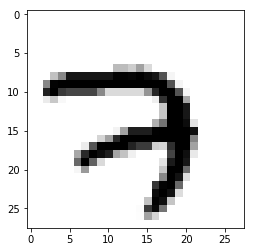

In [57]:
# let's have a look at the data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline

tmp = mnist.train.images[0]
tmp = tmp.reshape((28,28))

plt.imshow(tmp, cmap = cm.Greys)
plt.show()

In [58]:
print(mnist.train.labels[0])

7


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


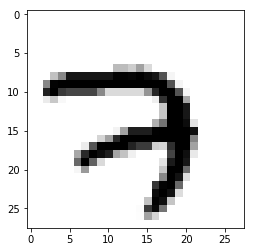

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [59]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
tmp = mnist.train.images[0]
tmp = tmp.reshape((28,28))

plt.imshow(tmp, cmap = cm.Greys)
plt.show()

"""
A one-hot vector is a vector which is 0 in most dimensions, 
and 1 in a single dimension. In this case, the n-th digit will be represented as a 
vector which is 1 in the n-h dimension.
"""

print(mnist.train.labels[0])

In [60]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
logs_path = '/tmp/tensorflow_logs/example'

# tf Graph Input
# mnist data image of shape 28*28=784
"""
When we assign None to our placeholder, it means the placeholder can be fed as 
many examples as you want to give it. 
In this case, our placeholder can be fed any multitude of 784-sized values.
"""
x = tf.placeholder(tf.float32, [None, 784], name='InputData')

# 0-9 digits recognition => 10 classes
# this is the placeholder where we will input our answers
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

In [61]:
# Set model weights and bias
"""
We create these Variables by giving tf.Variable the initial value: 
in this case, we initialize both W and b as tensors full of zeros.
Since we are going to learn W and b, it doesn't matter very much what they initially are.
"""

W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

In [62]:
# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    # We make our prediction by multiplying each flattened digit by our weight and then adding the bias
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

In [63]:
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    # The higher the cost, the higher the level of inaccuracy. 
    # It calculates accuracy by comparing the true values 
    # from y_train to the results of our prediction pred for each example. 
    # The goal is to minimize your loss.
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    # tf.reduce_sum adds the elements in the second dimension of y, due to the reduction_indices=[1] parameter
    # tf.reduce_mean computes the mean over all the examples in the batch
with tf.name_scope('SGD'):
    # Gradient Descent to reduce the loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    # tf.argmax(y,1) is the label our model thinks is most likely for each input, 
    # while tf.argmax(y_,1) is the correct label
    # we use tf.equal to check if our prediction matches the truth.
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # That gives us a list of booleans. To determine what fraction are correct, 
    # we cast to floating point numbers and then take the mean
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    # for example, [True, False, True, True] would become [1,0,1,1] which would become 0.75

In [64]:
# Initializing the variables
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.184210822
Epoch: 0002 cost= 0.665221844
Epoch: 0003 cost= 0.552807781
Epoch: 0004 cost= 0.498691760
Epoch: 0005 cost= 0.465533523
Epoch: 0006 cost= 0.442609970
Epoch: 0007 cost= 0.425554885
Epoch: 0008 cost= 0.412187044
Epoch: 0009 cost= 0.401421105
Epoch: 0010 cost= 0.392369530
Epoch: 0011 cost= 0.384729818
Epoch: 0012 cost= 0.378186758
Epoch: 0013 cost= 0.372390979
Epoch: 0014 cost= 0.367318740
Epoch: 0015 cost= 0.362760928
Epoch: 0016 cost= 0.358562535
Epoch: 0017 cost= 0.354818366
Epoch: 0018 cost= 0.351448950
Epoch: 0019 cost= 0.348316518
Epoch: 0020 cost= 0.345478419
Epoch: 0021 cost= 0.342757122
Epoch: 0022 cost= 0.340268253
Epoch: 0023 cost= 0.337912548
Epoch: 0024 cost= 0.335699880
Epoch: 0025 cost= 0.333715808
Optimization Finished!
Accuracy: 0.9136


In [65]:
# the summaries are also visualized in tensorboard

from IPython.display import Image
Image(url='Resources/summary_tensorboard.png')

In [66]:
# to start your TensorBoard, you would first need to dump your data to disk
writer = tf.summary.FileWriter("/tmp")
writer.add_graph(sess.graph)
show_graph(tf.get_default_graph().as_graph_def())

In [1]:
# let's look at a high level abstraction library tflearn
# pip install tflearn

In [2]:
# simple linear regression example
import tflearn
from __future__ import absolute_import, division, print_function
# Regression data
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]

# Linear Regression graph
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
                                metric='R2', learning_rate=0.01)
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=1000, show_metric=True, snapshot_epoch=False)

print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

Training Step: 1000  | total loss: 0.15393 | time: 0.003s
| SGD | epoch: 1000 | loss: 0.15393 - R2: 0.9743 -- iter: 17/17

Regression result:
Y = [ 0.25373101]*X + [ 0.78394109]


In [3]:
print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))


Test prediction for x = 3.2, 3.3, 3.4:
[ 1.59588027  1.62125349  1.64662647]


In [1]:
# another example with Titanic Dataset from Kaggle

In [53]:
# http://tflearn.org/tutorials/quickstart.html
import numpy as np
import tflearn
# make sure you have pandas=0.19.2 in your virtual environment for this example to work
# conda install pandas=0.19.2

# Download the Titanic dataset
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=2)

# let's look at the data

# print column names
print(" class |", " name |", " sex |", " age |", " # of siblings on board |", " # of parents/children on board |", " ticket # |", " fare |")

# print out some data samples
for element in data[1:10]:
    print(element)

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Succesfully downloaded titanic_dataset.csv 82865 bytes.
 class |  name |  sex |  age |  # of siblings on board |  # of parents/children on board |  ticket # |  fare |
['1', 'Allison, Master. Hudson Trevor', 'male', '0.9167', '1', '2', '113781', '151.5500']
['1', 'Allison, Miss. Helen Loraine', 'female', '2', '1', '2', '113781', '151.5500']
['1', 'Allison, Mr. Hudson Joshua Creighton', 'male', '30', '1', '2', '113781', '151.5500']
['1', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'female', '25', '1', '2', '113781', '151.5500']
['1', 'Anderson, Mr. Harry', 'male', '48', '0', '0', '19952', '26.5500']
['1', 'Andrews, Miss. Kornelia Theodosia', 'female', '63', '1', '0', '13502', '77.9583']
['1', 'Andrews, Mr. Thomas Jr', 'male', '39', '0', '0', '112050', '0.0000']
['1', 'Appleton, Mrs. Edward D

In [3]:
# Preprocessing function
def preprocess(data, columns_to_ignore):
    # Sort by descending id and delete columns
    for id in sorted(columns_to_ignore, reverse=True):
        [r.pop(id) for r in data]
    for i in range(len(data)):
        # Converting 'sex' field to float (id is 1 after removing labels column)
        data[i][1] = 1. if data[i][1] == 'female' else 0.
    return np.array(data, dtype=np.float32)

# Ignore 'name' and 'ticket' columns (id 1 & 6 of data array)
to_ignore=[1, 6]

# Preprocess data
data = preprocess(data, to_ignore)

In [4]:
# Build neural network
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(data, labels, n_epoch=10, batch_size=16, show_metric=True)

# if this doesn't work, restart your notebook kernel!

Training Step: 819  | total loss: 0.54480 | time: 0.299s
| Adam | epoch: 010 | loss: 0.54480 - acc: 0.7566 -- iter: 1296/1309
Training Step: 820  | total loss: 0.51864 | time: 0.302s
| Adam | epoch: 010 | loss: 0.51864 - acc: 0.7684 -- iter: 1309/1309
--


In [5]:
# Let's create some data for DiCaprio and Winslet
dicaprio = [3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000]
winslet = [1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000]
# Preprocess data
dicaprio, winslet = preprocess([dicaprio, winslet], to_ignore)
# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio, winslet])
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.136774
Winslet Surviving Rate: 0.884572
